In [19]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import LidarProfileFunctions as lp
import ExternalDataFunctions as ex
import GVHSRLlib as gv

import glob
import datetime

import cartopy.crs as ccrs

%matplotlib inline

In [20]:
gv_data_path = '/Users/mhayman/Documents/HSRL/GVHSRL/SOCRATES/SOCRATESrf09/'
ncep_data_path = '/Users/mhayman/Documents/Python/lidar/external_data/'

In [21]:
gv_data_files = sorted(glob.glob(gv_data_path+'SOCRATES*GVHSRL*.nc'))
print(gv_data_files)
load_start = datetime.datetime(year=2018,month=1,day=5,hour=0,minute=10)
load_stop = datetime.datetime(year=2019,month=3,day=5,hour=0,minute=45)

['/Users/mhayman/Documents/HSRL/GVHSRL/SOCRATES/SOCRATESrf09/SOCRATESrf09_GVHSRL_20180204T2300_20180205T0000.nc', '/Users/mhayman/Documents/HSRL/GVHSRL/SOCRATES/SOCRATESrf09/SOCRATESrf09_GVHSRL_20180205T0000_20180205T0100.nc', '/Users/mhayman/Documents/HSRL/GVHSRL/SOCRATES/SOCRATESrf09/SOCRATESrf09_GVHSRL_20180205T0100_20180205T0200.nc', '/Users/mhayman/Documents/HSRL/GVHSRL/SOCRATES/SOCRATESrf09/SOCRATESrf09_GVHSRL_20180205T0200_20180205T0300.nc', '/Users/mhayman/Documents/HSRL/GVHSRL/SOCRATES/SOCRATESrf09/SOCRATESrf09_GVHSRL_20180205T0300_20180205T0400.nc']


In [71]:
hsrl_profile_list = ['Aerosol_Backscatter_Coefficient','Optical_Depth','Particle_Depolarization','Aerosol_Extinction_Coefficient']
profs,lidar_data,aircraft_data = gv.load_GVHSRL_processed_files(gv_data_files,hsrl_profile_list,
                                lidar_vars=['lidar_pointing'],
                                air_vars = ['GGALT','ROLL','PITCH','GGLAT','GGLON','Time'],
                                load_mask = True,
                                time_start = load_start,
                                time_stop = load_stop,
                                path = '')

00:10 - 00:45:


/Users/mhayman/Documents/Python/Lidar/NCAR-LidarProcessing/libraries/LidarProfileFunctions.py:3112: RuntimeWarning: invalid value encountered in greater
  loaded_prof.profile_variance = f.variables[var_name+'_variance'][:].copy()
/Users/mhayman/Documents/Python/Lidar/NCAR-LidarProcessing/libraries/LidarProfileFunctions.py:3087: RuntimeWarning: invalid value encountered in greater
  loaded_prof = LidarProfile(f.variables[var_name][:],timeD,\


In [22]:
hsrl_ds = xr.open_dataset(gv_data_files[0], engine='netcdf4')
print(hsrl_ds.dims)

Frozen(SortedKeysDict({'ATXdim0': 6664, 'range': 1848, 'range_Raw_Unassigned_Channel': 4000, 'GGLONdim0': 6664, 'TelescopeDirectiondim0': 6664, 'ROLLdim0': 6664, 'range_Raw_High_Gain_Total_Backscatter_Channel': 4000, 'PSXCdim0': 6664, 'range_Raw_Cross_Polarization_Channel': 4000, 'time': 6664, 'range_Raw_Low_Gain_Total_Backscatter_Channel': 4000, 'est_bin0dim0': 1, 'GGALTdim0': 6664, 'TASXdim0': 6664, 'lidar_pointingdim0': 3, 'range_Raw_Molecular_Backscatter_Channel': 4000, 'lidar_pointingdim1': 6664, 'PITCHdim0': 6664, 'GGLATdim0': 6664, 'THDGdim0': 6664, 'polarizationdim0': 6664}))


In [23]:
hsrl_ds.keys()

KeysView(<xarray.Dataset>
Dimensions:                                           (ATXdim0: 6664, GGALTdim0: 6664, GGLATdim0: 6664, GGLONdim0: 6664, PITCHdim0: 6664, PSXCdim0: 6664, ROLLdim0: 6664, TASXdim0: 6664, THDGdim0: 6664, TelescopeDirectiondim0: 6664, est_bin0dim0: 1, lidar_pointingdim0: 3, lidar_pointingdim1: 6664, polarizationdim0: 6664, range: 1848, range_Raw_Cross_Polarization_Channel: 4000, range_Raw_High_Gain_Total_Backscatter_Channel: 4000, range_Raw_Low_Gain_Total_Backscatter_Channel: 4000, range_Raw_Molecular_Backscatter_Channel: 4000, range_Raw_Unassigned_Channel: 4000, time: 6664)
Coordinates:
  * time                                              (time) datetime64[ns] 2018-02-04T23:04:27.500000 ...
  * range                                             (range) float32 154.24323 ...
  * range_Raw_Unassigned_Channel                      (range_Raw_Unassigned_Channel) float32 -265.46622 ...
  * range_Raw_Cross_Polarization_Channel              (range_Raw_Cross_Polarization

In [24]:
#hsrl_ds['Aerosol_Backscatter_Coefficient'].attrs.keys()
hsrl_ds['time'].data
#hsrl_ds['GGALT'].plot()

array(['2018-02-04T23:04:27.500000000', '2018-02-04T23:04:28.000000000',
       '2018-02-04T23:04:28.500000000', ...,
       '2018-02-04T23:59:58.000000000', '2018-02-04T23:59:58.500000000',
       '2018-02-04T23:59:59.000000000'], dtype='datetime64[ns]')

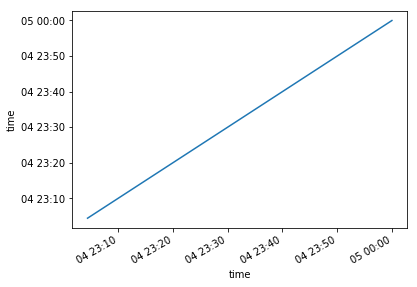

In [25]:
hsrl_ds['time'].plot()

In [26]:
lidar_pointing = xr.DataArray(data=hsrl_ds['lidar_pointing'].data, dims=['coordinate','time'], 
                    coords={'time': hsrl_ds['time'].data, 'coordinate':[0,1,2]},
                    name='lidar_pointing_direction',
                    attrs={'description': 'unit vector indicating the lidar\'s pointing direction'})
GGALT = xr.DataArray(data=hsrl_ds['GGALT'].data,dims=['time'],coords={'time':hsrl_ds['time'].data},
                    name='aircraft_altitude',
                    attrs={'units':'meters'})

lidar_range = hsrl_ds['range']
pixel_position = lidar_range*lidar_pointing
pixel_position_x = lidar_range*lidar_pointing.sel(coordinate=0)
pixel_position_y = lidar_range*lidar_pointing.sel(coordinate=1)
pixel_position_z = GGALT-lidar_range*lidar_pointing.sel(coordinate=2)


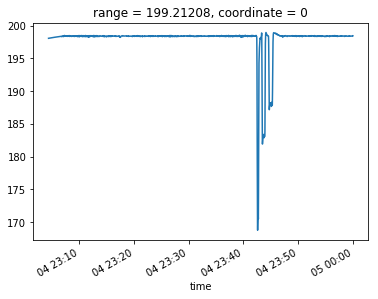

In [44]:
lp.dist_from_latlon(latitude,longitude,lat0=GGLAT0,lon0=GGLON0)

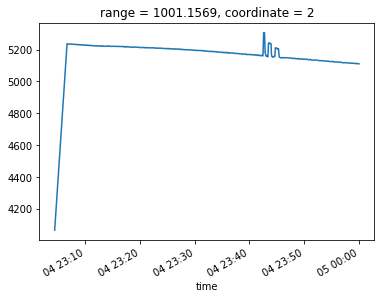

In [14]:
pixel_position_z.sel(range=1000,method='nearest').plot()


In [27]:
#print(glob.glob(ncep_data_path+'*air*2018.nc'))
ncep_file = glob.glob(ncep_data_path+'*air*2018.nc')
ncep_ds = xr.open_dataset(ncep_file[0], engine='netcdf4')

In [42]:
ncep_ds

<xarray.Dataset>
Dimensions:  (lat: 73, level: 17, lon: 144, time: 1268)
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) datetime64[ns] 2018-01-01 2018-01-01T06:00:00 ...
Data variables:
    air      (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          4x daily NMC reanalysis (2014)
    history:        created 2013/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

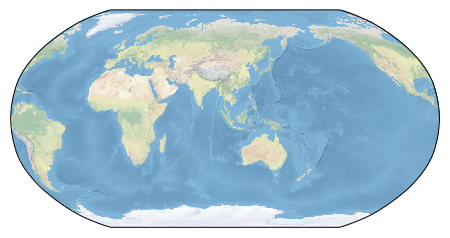

In [46]:
fig = plt.figure(figsize=(10,4))
axm = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=100.))
axm.set_global()

axm.stock_img()

/Users/mhayman/anaconda/lib/python3.5/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


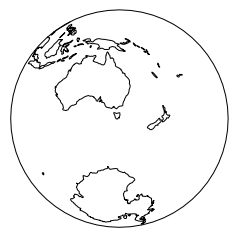

In [75]:

fig = plt.figure(figsize=(10,4))
axm = fig.add_subplot(1,1,1,
                      projection=ccrs.NearsidePerspective(central_longitude=hsrl_ds['GGLON'].data[0], 
                                                          central_latitude=hsrl_ds['GGLAT'].data[0]))
axm.set_global()

#axm.stock_img()
axm.coastlines()
 

In [51]:
print(hsrl_ds['GGLON'][0])
print(hsrl_ds['GGLAT'][0])

<xarray.DataArray 'GGLON' ()>
array(148.041381)
Attributes:
    units:        degrees
    description:  longitude
<xarray.DataArray 'GGLAT' ()>
array(-43.427815)
Attributes:
    units:        degrees
    description:  latitude


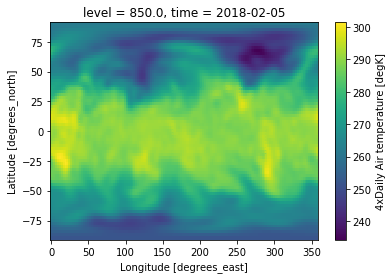

In [18]:
ncep_ds['air'].sel(time=hsrl_ds['time'].data[0],level=800,method='nearest').plot()

/Users/mhayman/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


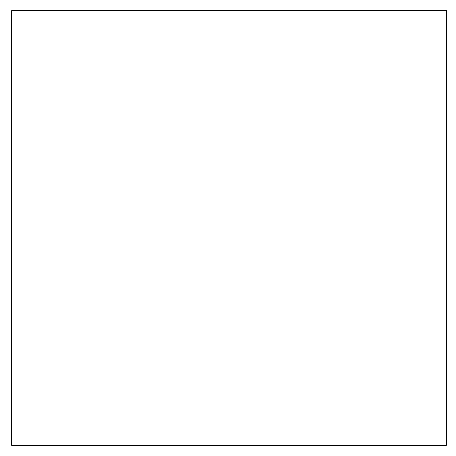

In [14]:

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.NearsidePerspective(central_longitude=hsrl_ds['GGLON'].data[0], 
                                                          central_latitude=hsrl_ds['GGLAT'].data[0]))
cf = ax.contourf(ncep_ds['lon'].data, ncep_ds['lat'].data, 
                 ncep_ds['air'].sel(time=hsrl_ds['time'].data[0],level=800,method='nearest'),
                 transform=ccrs.NearsidePerspective())

ax.coastlines()
# land = ax.add_feature(
#    cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='black'))

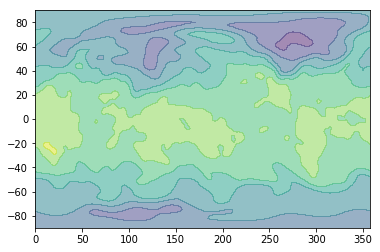

In [72]:
plt.contourf(ncep_ds['lon'].data, ncep_ds['lat'].data, 
                 ncep_ds['air'].sel(time=hsrl_ds['time'].data[0],level=800,method='nearest'),alpha=0.5)

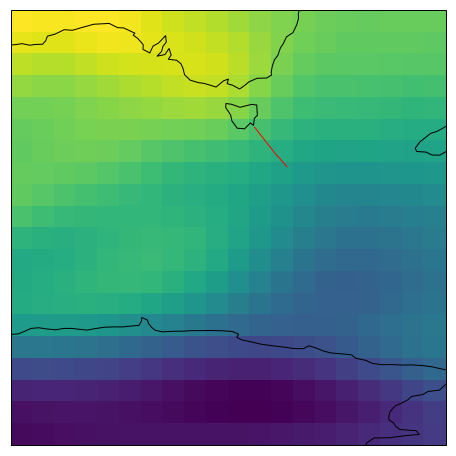

In [73]:
#from cartopy.util import add_cyclic_point
ncep_air = ncep_ds['air'].sel(lat=slice(-30,-80),lon=slice(120,170),
                             time=slice(datetime.datetime(2018,1,1),datetime.datetime(2018,3,1)))

#field, lon = add_cyclic_point(ncep_air.sel(time=hsrl_ds['time'].data[0],level=800,method='nearest').data, 
#                              coord=ncep_ds['lon'].data)
#lat = ncep_ds['lat'].data

central_lon = hsrl_ds['GGLON'].data[0]

lat = ncep_air['lat'].data
lon = ncep_air['lon'].data-central_lon
field = ncep_air.sel(time=hsrl_ds['time'].data[0],level=800,method='nearest')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=central_lon))
cf = ax.pcolor(lon, lat, 
                 field,
                 transform=ccrs.PlateCarree(central_longitude=central_lon))

ax.coastlines()
#ax.stock_img()
#ax.set_extent([120, 170, -70, -30], crs=ccrs.PlateCarree())

fp = ax.plot(hsrl_ds['GGLON'].data-central_lon,hsrl_ds['GGLAT'].data,
             color='red',linewidth=1.0,
             transform=ccrs.PlateCarree(central_longitude=central_lon))


In [70]:
from cartopy.util import add_cyclic_point
field, lon = add_cyclic_point(ncep_ds['air'].sel(time=hsrl_ds['time'].data[0],level=800,method='nearest').data, 
                              coord=ncep_ds['lon'].data)

lat = ncep_ds['lat'].data

central_lon = aircraft_data['GGLON'][0]


#lat = ncep_ds['lat'].data
#lon = ncep_ds['lon'].data
#field = ncep_ds['air'].sel(time=hsrl_ds['time'].data[0],level=800,method='nearest')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=central_lon))
cf = ax.contourf(lon, lat, 
                 field,
                 transform=ccrs.PlateCarree(central_longitude=central_lon))

ax.coastlines()
#ax.stock_img()
ax.set_extent([140, 170, -70, -30], crs=ccrs.PlateCarree())

fp = ax.plot(aircraft_data['GGLON']-central_lon,aircraft_data['GGLAT'],
             color='red',linewidth=1.0,
             transform=ccrs.PlateCarree(central_longitude=central_lon))

/Users/mhayman/anaconda/lib/python3.5/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


NameError: name 'aircraft_data' is not defined

In [129]:
lon.min()
lon.max()

357.5

In [151]:
profs.keys()

dict_keys(['Aerosol_Backscatter_Coefficient', 'Particle_Depolarization', 'Aerosol_Extinction_Coefficient', 'Optical_Depth'])

In [11]:
pixel_position_z.dims

('time', 'range')

<xarray.DataArray 'aircraft_altitude' (time: 6664)>
array([5060.812607, 5065.171078, 5069.529548, ..., 6108.255371, 6108.235596,
       6108.21582 ])
Coordinates:
  * time     (time) datetime64[ns] 2018-02-04T23:04:27.500000 ...
Attributes:
    units:    meters

In [16]:
ncep_file = glob.glob(ncep_data_path+'*hgt*2018.nc')
ncep_ds = xr.open_dataset(ncep_file[0], engine='netcdf4')

In [17]:
ncep_ds

<xarray.Dataset>
Dimensions:  (lat: 73, level: 17, lon: 144, time: 1268)
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) datetime64[ns] 2018-01-01 2018-01-01T06:00:00 ...
Data variables:
    hgt      (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          4x daily NMC reanalysis (2014)
    history:        created 2013/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

In [ ]:
hgtdata=ncep_ds.interp(time=hsrl_ds['time'].data, lat=hsrl_ds['GGLON'].data.data, lon=hsrl_ds['GGLON'].data)

In [1]:
hgtdata.dims

NameError: name 'hgtdata' is not defined

In [63]:
ncep_air = ncep_ds['air'].sel(lat=slice(-30,-80),lon=slice(120,170),
                             time=slice(datetime.datetime(2018,1,1),datetime.datetime(2018,3,1)))
ncep_air

<xarray.DataArray 'air' (time: 237, level: 17, lat: 21, lon: 21)>
[1776789 values with dtype=float32]
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 ...
  * lat      (lat) float32 -30.0 -32.5 -35.0 -37.5 -40.0 -42.5 -45.0 -47.5 ...
  * lon      (lon) float32 120.0 122.5 125.0 127.5 130.0 132.5 135.0 137.5 ...
  * time     (time) datetime64[ns] 2018-01-01 2018-01-01T06:00:00 ...
Attributes:
    long_name:     4xDaily Air temperature
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    level_desc:    Multiple levels
    statistic:     Individual Obs
    parent_stat:   Other
    valid_range:   [150. 350.]
    dataset:       NCEP Reanalysis
    actual_range:  [179.1 324.9]

In [57]:
ncep_ds['air']

<xarray.DataArray 'air' (time: 1268, level: 17, lat: 73, lon: 144)>
[226596672 values with dtype=float32]
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) datetime64[ns] 2018-01-01 2018-01-01T06:00:00 ...
Attributes:
    long_name:     4xDaily Air temperature
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    level_desc:    Multiple levels
    statistic:     Individual Obs
    parent_stat:   Other
    valid_range:   [150. 350.]
    dataset:       NCEP Reanalysis
    actual_range:  [179.1 324.9]

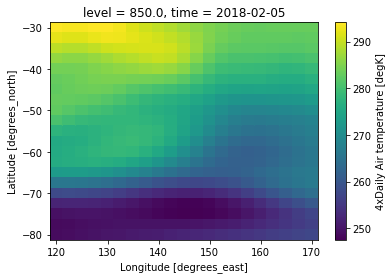

In [65]:
field = ncep_air.sel(time=hsrl_ds['time'].data[0],level=800,method='nearest')
field.plot()

In [74]:
ncep_file = glob.glob(ncep_data_path+'*air*2018.nc')
ncep_ds_temp = xr.open_dataset(ncep_file[0], engine='netcdf4')
ncep_air = ncep_ds_temp['air'].sel(lat=slice(-30,-80),lon=slice(120,170),
                             time=slice(datetime.datetime(2018,1,1),datetime.datetime(2018,3,1)))

In [ ]:
air_interp = ncep_air.interp(time=hsrl_ds['time'].data, lat=hsrl_ds['GGLON'].data, lon=hsrl_ds['GGLON'].data)